In [ ]:
#Importação do Pyspark para o projeto
!pip install pyspark

In [ ]:
from pyspark.sql import SparkSession
import matplotlib.pyplot as plt
from pyspark.sql.functions import col


# Configuração do SparkSession
spark = SparkSession.builder.appName("CombustivelSpark").getOrCreate()

# Verifica a versão do Spark
print("Versão do Spark:", spark.version)

Versão do Spark: 3.5.0


In [ ]:
#Leitura do dataFrame
data_estados = spark.read.csv('combustiveis-estados.csv')
data_estados.show()

+----------+----+---+------------+------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+
|       _c0| _c1|_c2|         _c3|               _c4|                 _c5|                 _c6|                 _c7|                 _c8|                 _c9|                _c10|                _c11|                _c12|                _c13|                _c14|                _c15|                _c16|                _c17|                _c18|                _c19|                _c20|                _c21|                _c22|                _c23|                _c24|                _c25|
+---------

In [ ]:
#Deletando alguns dados que não utilizaremos por agora

df_estados = data_estados
df_estados = data_estados.drop('_c0','_c6','_c7','_c8','_c9','_c10','_c12','_c13','_c15','_c16','_c17', '_c18', '_c19', '_c20', '_c21','_c22','_c24','_c25')
df_estados.show()

+----+---+------------+------------------+--------------------+--------------------+--------------------+--------------------+
| _c1|_c2|         _c3|               _c4|                 _c5|                _c11|                _c14|                _c23|
+----+---+------------+------------------+--------------------+--------------------+--------------------+--------------------+
| ano|mes|      regiao|            estado|gasolina_comum_pr...|etanol_hidratado_...|oleo_diesel_preco...|gas_natural_veicu...|
|2001| 07|       NORTE|              ACRE|              1.8254|               1.332|               0.874|                NULL|
|2001| 07|    NORDESTE|           ALAGOAS|               1.666|              1.0225|              0.8415|              0.7426|
|2001| 07|       NORTE|             AMAPA|              1.8367|               1.331|              0.8697|                NULL|
|2001| 07|       NORTE|          AMAZONAS|              1.8239|              1.2201|              0.8222|      

In [ ]:
df_estados.show()

+----+---+------------+------------------+--------------------+--------------------+--------------------+--------------------+
| _c1|_c2|         _c3|               _c4|                 _c5|                _c11|                _c14|                _c23|
+----+---+------------+------------------+--------------------+--------------------+--------------------+--------------------+
| ano|mes|      regiao|            estado|gasolina_comum_pr...|etanol_hidratado_...|oleo_diesel_preco...|gas_natural_veicu...|
|2001| 07|       NORTE|              ACRE|              1.8254|               1.332|               0.874|                NULL|
|2001| 07|    NORDESTE|           ALAGOAS|               1.666|              1.0225|              0.8415|              0.7426|
|2001| 07|       NORTE|             AMAPA|              1.8367|               1.331|              0.8697|                NULL|
|2001| 07|       NORTE|          AMAZONAS|              1.8239|              1.2201|              0.8222|      

In [ ]:
#Formatando o Nome de Algumas colunas

df_estados = df_estados.withColumnRenamed('_c4', 'Estado').withColumnRenamed('_c5', 'Gasolina Comum Preço Revenda Média')\
.withColumnRenamed('_c1', 'Ano').withColumnRenamed('_c3', 'Região').withColumnRenamed('_c2', 'Mês')\
.withColumnRenamed('_c6', 'Gasolina Comum Preço Revenda Mínimo').withColumnRenamed('_c7', 'Gasolina Comum Preço Revenda Máximo')\
.withColumnRenamed('_c8', 'Gasolina Aditivada Preço Revenda Média').withColumnRenamed('_c9', 'Gasolina Aditivada Preço Revenda Mínimo')\
.withColumnRenamed('_c10', 'Gasolina Aditivada Preço Revenda Máximo').withColumnRenamed('_c14', 'Óleo Diesel Preço Revenda Média')\
.withColumnRenamed('_c15', 'Óleo Diesel Preço Revenda Mínimo').withColumnRenamed('_c16', 'Óleo Diesel Preço Revenda Máximo')\
.withColumnRenamed('_c11', 'Etanol Hidratado Preço Revenda Media').withColumnRenamed('_c12', 'Etanol Hidratado Preço Revenda Mínimo').withColumnRenamed('_c13', 'Etanol Hidratado Preço Revenda Máximo')\
.withColumnRenamed('_c23', 'GNV Preço Revenda Média').withColumnRenamed('_c24', 'GNV Preço Revenda Mínimo').withColumnRenamed('_c25', 'GNV Preço Revenda Máximo')


#Tratando a primeira linha

from pyspark.sql.functions import col, date_format

criterio = col("Ano") == "ano"
df_estados = df_estados.filter(~criterio)

df_estados.show()



+----+---+------------+-------------------+----------------------------------+------------------------------------+-------------------------------+-----------------------+
| Ano|Mês|      Região|             Estado|Gasolina Comum Preço Revenda Média|Etanol Hidratado Preço Revenda Media|Óleo Diesel Preço Revenda Média|GNV Preço Revenda Média|
+----+---+------------+-------------------+----------------------------------+------------------------------------+-------------------------------+-----------------------+
|2001| 07|       NORTE|               ACRE|                            1.8254|                               1.332|                          0.874|                   NULL|
|2001| 07|    NORDESTE|            ALAGOAS|                             1.666|                              1.0225|                         0.8415|                 0.7426|
|2001| 07|       NORTE|              AMAPA|                            1.8367|                               1.331|                         

In [ ]:
# Lista de nomes de colunas a serem convertidas para float
colunas_para_converter = [
    'Ano',
    'Mês',
    'Gasolina Comum Preço Revenda Média',
    'Etanol Hidratado Preço Revenda Media',
    'Óleo Diesel Preço Revenda Média',
    'GNV Preço Revenda Média',
]

# Convertendo as colunas para float
for coluna in colunas_para_converter:
    df_estados = df_estados.withColumn(coluna, col(coluna).cast('float'))




In [ ]:
#Isolando os dados por regiões em datasets separados

df_nordeste = df_estados.filter(col("Região") == "NORDESTE")
df_sudeste = df_estados.filter(col("Região") == "SUDESTE")
df_norte = df_estados.filter(col("Região") == "NORTE")
df_centro = df_estados.filter(col("Região") == "CENTRO OESTE")
df_sul = df_estados.filter(col("Região") == "SUL")

df_nordeste.show()

+------+---+--------+-------------------+----------------------------------+------------------------------------+-------------------------------+-----------------------+
|   Ano|Mês|  Região|             Estado|Gasolina Comum Preço Revenda Média|Etanol Hidratado Preço Revenda Media|Óleo Diesel Preço Revenda Média|GNV Preço Revenda Média|
+------+---+--------+-------------------+----------------------------------+------------------------------------+-------------------------------+-----------------------+
|2001.0|7.0|NORDESTE|            ALAGOAS|                             1.666|                              1.0225|                         0.8415|                 0.7426|
|2001.0|7.0|NORDESTE|              BAHIA|                            1.7145|                              1.1533|                         0.8416|                 0.7261|
|2001.0|7.0|NORDESTE|              CEARA|                            1.7144|                              1.1626|                         0.9232|     

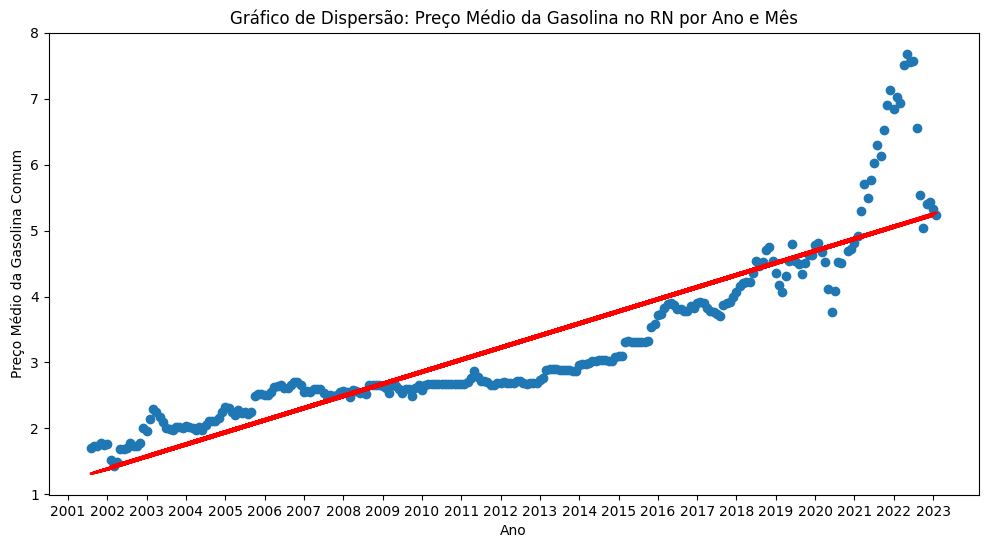

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:         Media_Gasolina   R-squared (uncentered):                   0.869
Model:                            OLS   Adj. R-squared (uncentered):              0.868
Method:                 Least Squares   F-statistic:                              851.3
Date:                Thu, 07 Dec 2023   Prob (F-statistic):                   7.70e-114
Time:                        13:21:41   Log-Likelihood:                         -428.34
No. Observations:                 258   AIC:                                      860.7
Df Residuals:                     256   BIC:                                      867.8
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Ano            0.0016   8.44e-05     19.533      0.000       0.001       0.002
Mês           -0.0053      0.023     -0.233      0.816      -0.051       0.040
==============================================================================
Omnibus:                       64.538   Durbin-Watson:                   1.809
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              111.377
Skew:                           1.373   Prob(JB):                     6.53e-25
Kurtosis:                       4.681   Cond. No.                         580.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
import matplotlib.pyplot as plt
from pyspark.sql import SparkSession
from pyspark.sql.functions import col
import numpy as np
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm


# Agrupe dados do RN por ano, mês e média de Preços
df_RN = df_nordeste.filter(col("Estado") == "RIO GRANDE DO NORTE")
df_rn_agrupado = df_RN.groupBy("Ano", "Mês").agg({"Gasolina Comum Preço Revenda Média": "mean"})
df_rn_agrupado = df_rn_agrupado.withColumnRenamed("avg(Gasolina Comum Preço Revenda Média)", "Media_Gasolina")
df_agrupado_pandas = df_rn_agrupado.toPandas()
plt.figure(figsize=(12, 6))


# Criar um gráfico de dispersão
plt.scatter(df_agrupado_pandas['Ano'] + df_agrupado_pandas['Mês']/12, df_agrupado_pandas['Media_Gasolina'])
# / 12

# Adicionar rótulos e título
plt.xlabel('Ano')
plt.ylabel('Preço Médio da Gasolina Comum')
plt.title('Gráfico de Dispersão: Preço Médio da Gasolina no RN por Ano e Mês')

#Regressão Linear
#Ajustar uma regressão linear usando scikit-learn
X = df_agrupado_pandas[['Ano', 'Mês']]
y = df_agrupado_pandas['Media_Gasolina']
regressor = LinearRegression()
regressor.fit(X, y)

# Prever os valores usando a regressão linear
y_pred = regressor.predict(X)

# Plotar a linha de regressão
plt.plot(df_agrupado_pandas['Ano'] + df_agrupado_pandas['Mês'] / 12, y_pred, color='red', linewidth=2)
plt.xticks(np.arange(df_agrupado_pandas['Ano'].min(), df_agrupado_pandas['Ano'].max() + 1, 1))


# Exibir o gráfico
plt.show()

x = sm.add_constant(X)
modelo_4 = sm.OLS(y, X).fit()
modelo_4.summary()




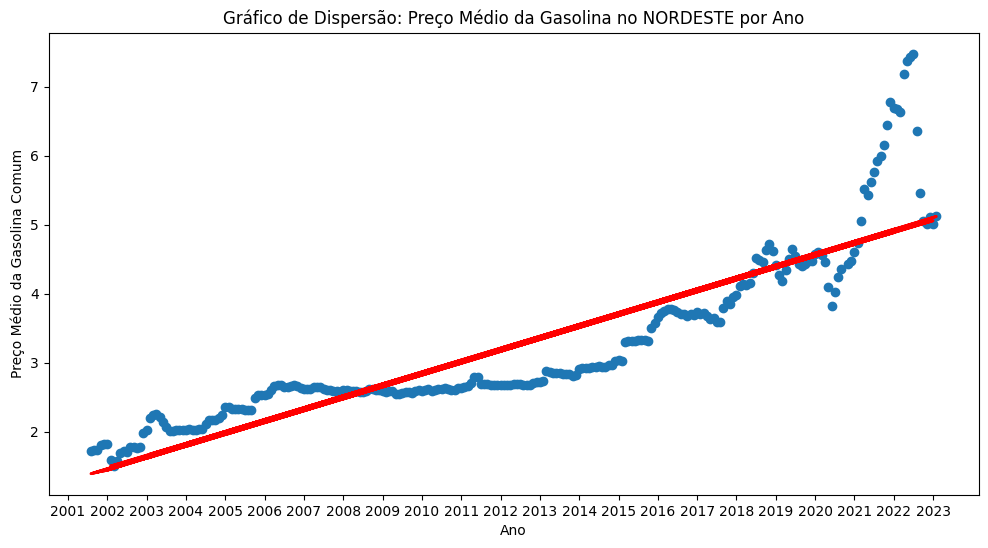

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:         Media_Gasolina   R-squared (uncentered):                   0.880
Model:                            OLS   Adj. R-squared (uncentered):              0.879
Method:                 Least Squares   F-statistic:                              936.3
Date:                Thu, 07 Dec 2023   Prob (F-statistic):                   1.82e-118
Time:                        13:23:09   Log-Likelihood:                         -412.75
No. Observations:                 258   AIC:                                      829.5
Df Residuals:                     256   BIC:                                      836.6
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Ano            0.0016   7.95e-05     20.556      0.000       0.001       0.002
Mês           -0.0070      0.022     -0.326      0.745      -0.050       0.036
==============================================================================
Omnibus:                       64.700   Durbin-Watson:                   1.808
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              112.203
Skew:                           1.371   Prob(JB):                     4.32e-25
Kurtosis:                       4.708   Cond. No.                         580.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
import matplotlib.pyplot as plt
from pyspark.sql.functions import col
import numpy as np
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm


# Agrupe dados do Nordeste por ano e média de Preços



df_nordest_agrupado = df_nordeste.groupBy("Ano", "Mês").agg({"Gasolina Comum Preço Revenda Média": "mean"})
df_nordest_agrupado = df_nordest_agrupado.withColumnRenamed("avg(Gasolina Comum Preço Revenda Média)", "Media_Gasolina")
df_agrupado_pandas = df_nordest_agrupado.toPandas()
plt.figure(figsize=(12, 6))

# Criar um gráfico de dispersão
plt.scatter(df_agrupado_pandas['Ano'] + df_agrupado_pandas['Mês'] / 12, df_agrupado_pandas['Media_Gasolina'])

# Adicionar rótulos e título
plt.xlabel('Ano')
plt.ylabel('Preço Médio da Gasolina Comum')
plt.title('Gráfico de Dispersão: Preço Médio da Gasolina no NORDESTE por Ano')

#Regressão Linear
# Ajustar uma regressão linear usando scikit-learn
X = df_agrupado_pandas[['Ano', 'Mês']]
y = df_agrupado_pandas['Media_Gasolina']
regressor = LinearRegression()
regressor.fit(X, y)

# Prever os valores usando a regressão linear
y_pred = regressor.predict(X)

# Plotar a linha de regressão
plt.plot(df_agrupado_pandas['Ano'] + df_agrupado_pandas['Mês'] / 12, y_pred, color='red', linewidth=2)
plt.xticks(np.arange(df_agrupado_pandas['Ano'].min(), df_agrupado_pandas['Ano'].max() + 1, 1))


# Exibir o gráfico
plt.show()

x = sm.add_constant(X)
modelo_4 = sm.OLS(y, X).fit()
modelo_4.summary()


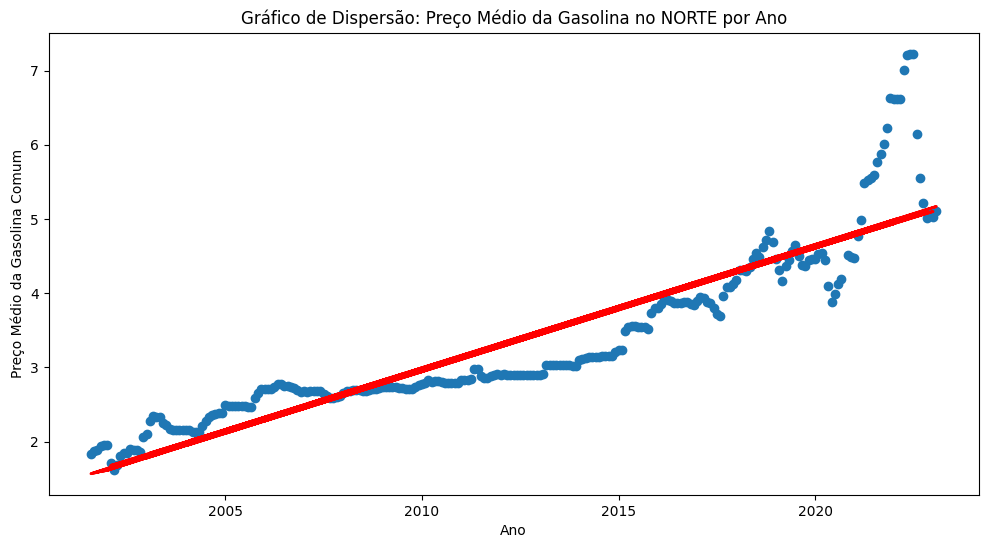

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:         Media_Gasolina   R-squared (uncentered):                   0.897
Model:                            OLS   Adj. R-squared (uncentered):              0.897
Method:                 Least Squares   F-statistic:                              1119.
Date:                Thu, 07 Dec 2023   Prob (F-statistic):                   2.92e-127
Time:                        13:23:39   Log-Likelihood:                         -398.60
No. Observations:                 258   AIC:                                      801.2
Df Residuals:                     256   BIC:                                      808.3
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Ano            0.0017   7.52e-05     22.474      0.000       0.002       0.002
Mês           -0.0074      0.020     -0.360      0.719      -0.048       0.033
==============================================================================
Omnibus:                       55.913   Durbin-Watson:                   1.825
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               88.661
Skew:                           1.250   Prob(JB):                     5.59e-20
Kurtosis:                       4.414   Cond. No.                         580.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
import matplotlib.pyplot as plt
from pyspark.sql import SparkSession
from pyspark.sql.functions import col
import numpy as np
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm


# Agrupe dados do Nordeste por ano e média de Preços



df_norte_agrupado = df_norte.groupBy("Ano", "Mês").agg({"Gasolina Comum Preço Revenda Média": "mean"})
df_norte_agrupado = df_norte_agrupado.withColumnRenamed("avg(Gasolina Comum Preço Revenda Média)", "Media_Gasolina")
df_agrupado_pandas = df_norte_agrupado.toPandas()
plt.figure(figsize=(12, 6))

# Criar um gráfico de dispersão
plt.scatter(df_agrupado_pandas['Ano'] + df_agrupado_pandas['Mês'] / 12, df_agrupado_pandas['Media_Gasolina'])
# Adicionar rótulos e título
plt.xlabel('Ano')
plt.ylabel('Preço Médio da Gasolina Comum')
plt.title('Gráfico de Dispersão: Preço Médio da Gasolina no NORTE por Ano')

#Regressão Linear
# Ajustar uma regressão linear usando scikit-learn
X = df_agrupado_pandas[['Ano', 'Mês']]
y = df_agrupado_pandas['Media_Gasolina']
regressor = LinearRegression()
regressor.fit(X, y)

# Prever os valores usando a regressão linear
y_pred = regressor.predict(X)

# Plotar a linha de regressão
plt.plot(df_agrupado_pandas['Ano'] + df_agrupado_pandas['Mês'] / 12, y_pred, color='red', linewidth=2)

# Exibir o gráfico
plt.show()

x = sm.add_constant(X)
modelo_4 = sm.OLS(y, X).fit()
modelo_4.summary()


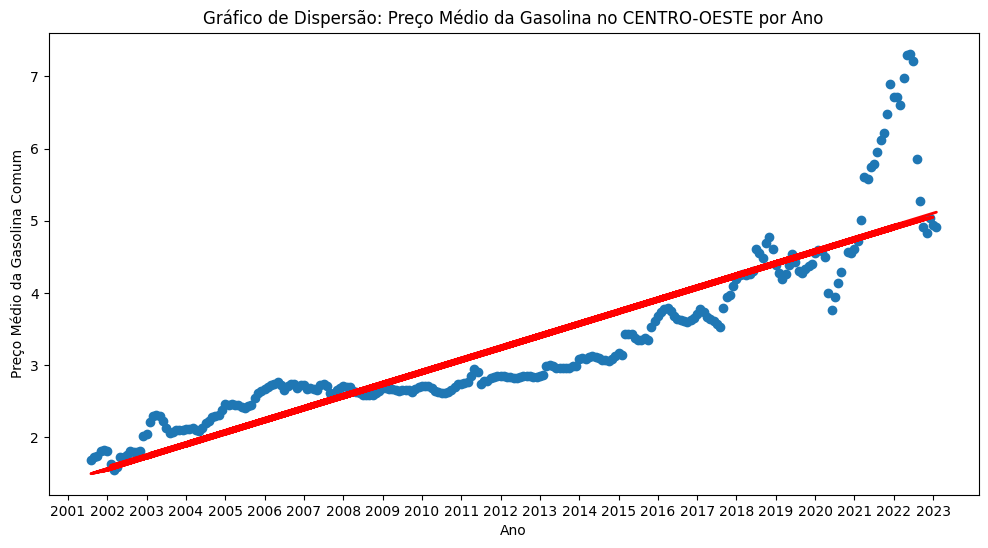

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:         Media_Gasolina   R-squared (uncentered):                   0.890
Model:                            OLS   Adj. R-squared (uncentered):              0.889
Method:                 Least Squares   F-statistic:                              1035.
Date:                Thu, 07 Dec 2023   Prob (F-statistic):                   2.24e-123
Time:                        13:24:01   Log-Likelihood:                         -403.99
No. Observations:                 258   AIC:                                      812.0
Df Residuals:                     256   BIC:                                      819.1
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Ano            0.0017   7.68e-05     21.626      0.000       0.002       0.002
Mês           -0.0076      0.021     -0.362      0.717      -0.049       0.034
==============================================================================
Omnibus:                       63.706   Durbin-Watson:                   1.813
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              110.510
Skew:                           1.346   Prob(JB):                     1.01e-24
Kurtosis:                       4.741   Cond. No.                         580.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
import matplotlib.pyplot as plt
from pyspark.sql import SparkSession
from pyspark.sql.functions import col
import numpy as np
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm


# Agrupe dados do Nordeste por ano e média de Preços



df_centro_agrupado = df_centro.groupBy("Ano", "Mês").agg({"Gasolina Comum Preço Revenda Média": "mean"})
df_centro_agrupado = df_centro_agrupado.withColumnRenamed("avg(Gasolina Comum Preço Revenda Média)", "Media_Gasolina")
df_agrupado_pandas = df_centro_agrupado.toPandas()
plt.figure(figsize=(12, 6))

# Criar um gráfico de dispersão
plt.scatter(df_agrupado_pandas['Ano'] + df_agrupado_pandas['Mês'] / 12, df_agrupado_pandas['Media_Gasolina'])

# Adicionar rótulos e título
plt.xlabel('Ano')
plt.ylabel('Preço Médio da Gasolina Comum')
plt.title('Gráfico de Dispersão: Preço Médio da Gasolina no CENTRO-OESTE por Ano')

#Regressão Linear
# Ajustar uma regressão linear usando scikit-learn
X = df_agrupado_pandas[['Ano', 'Mês']]
y = df_agrupado_pandas['Media_Gasolina']
regressor = LinearRegression()
regressor.fit(X, y)

# Prever os valores usando a regressão linear
y_pred = regressor.predict(X)

# Plotar a linha de regressão
plt.plot(df_agrupado_pandas['Ano'] + df_agrupado_pandas['Mês'] / 12, y_pred, color='red', linewidth=2)
plt.xticks(np.arange(df_agrupado_pandas['Ano'].min(), df_agrupado_pandas['Ano'].max() + 1, 1))


# Exibir o gráfico
plt.show()

x = sm.add_constant(X)
modelo_4 = sm.OLS(y, X).fit()
modelo_4.summary()


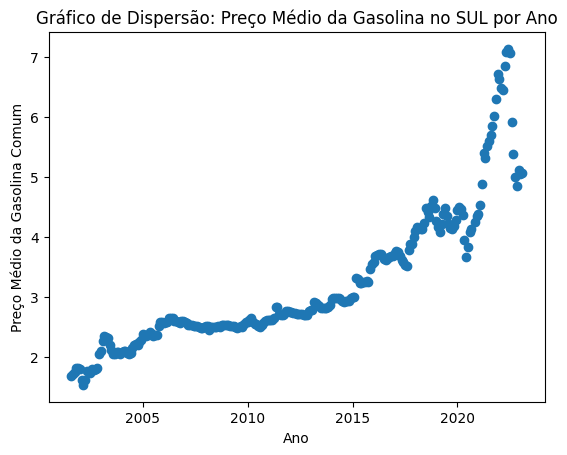

In [ ]:
import matplotlib.pyplot as plt
from pyspark.sql import SparkSession
from pyspark.sql.functions import col
import numpy as np
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm


# Agrupe dados do Nordeste por ano e média de Preços



df_sul_agrupado = df_sul.groupBy("Ano","Mês").agg({"Gasolina Comum Preço Revenda Média": "mean"})
df_sul_agrupado = df_sul_agrupado.withColumnRenamed("avg(Gasolina Comum Preço Revenda Média)", "Media_Gasolina")
df_agrupado_pandas = df_sul_agrupado.toPandas()
plt.figure(figsize=(12, 6))

# Criar um gráfico de dispersão
plt.scatter(df_agrupado_pandas['Ano'] + df_agrupado_pandas['Mês'] / 12, df_agrupado_pandas['Media_Gasolina'])

# Adicionar rótulos e título
plt.xlabel('Ano')
plt.ylabel('Preço Médio da Gasolina Comum')
plt.title('Gráfico de Dispersão: Preço Médio da Gasolina no SUL por Ano')

#Regressão Linear
# # Ajustar uma regressão linear usando scikit-learn
# X = df_agrupado_pandas[['Ano', 'Mês']]
# y = df_agrupado_pandas['Media_Gasolina']
# regressor = LinearRegression()
# regressor.fit(X, y)

# # Prever os valores usando a regressão linear
# y_pred = regressor.predict(X)

# # Plotar a linha de regressão
# plt.plot(df_agrupado_pandas['Ano'] + df_agrupado_pandas['Mês'] / 12, y_pred, color='red', linewidth=2)
#plt.xticks(np.arange(df_agrupado_pandas['Ano'].min(), df_agrupado_pandas['Ano'].max() + 1, 1))




# Exibir o gráfico
plt.show()
# x = sm.add_constant(X)
# modelo_4 = sm.OLS(y, X).fit()
# modelo_4.summary()


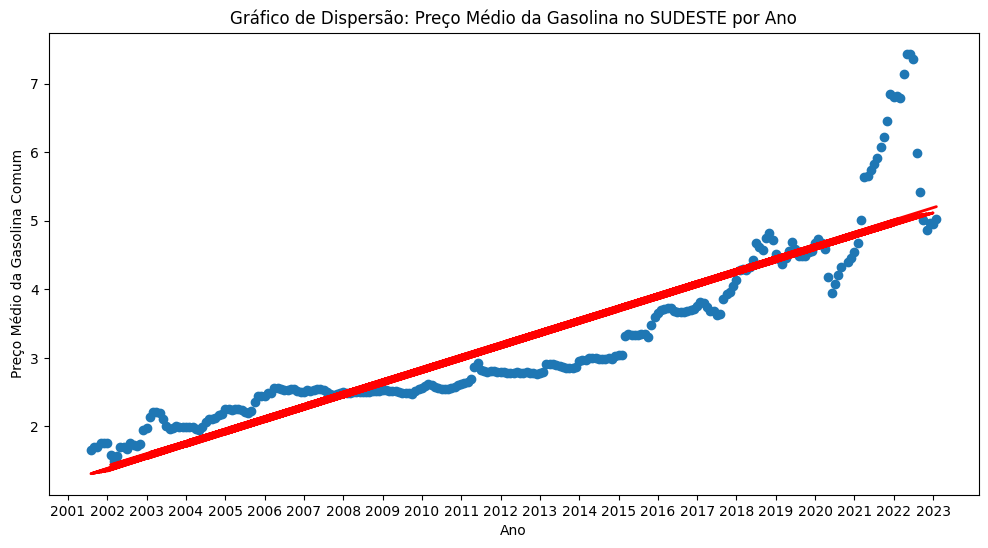

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:         Media_Gasolina   R-squared (uncentered):                   0.874
Model:                            OLS   Adj. R-squared (uncentered):              0.873
Method:                 Least Squares   F-statistic:                              887.6
Date:                Thu, 07 Dec 2023   Prob (F-statistic):                   7.31e-116
Time:                        06:31:37   Log-Likelihood:                         -419.49
No. Observations:                 258   AIC:                                      843.0
Df Residuals:                     256   BIC:                                      850.1
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Ano            0.0016   8.16e-05     20.118      0.000       0.001       0.002
Mês           -0.0096      0.022     -0.435      0.664      -0.053       0.034
==============================================================================
Omnibus:                       58.083   Durbin-Watson:                   1.818
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               93.215
Skew:                           1.293   Prob(JB):                     5.74e-21
Kurtosis:                       4.407   Cond. No.                         580.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
import matplotlib.pyplot as plt
from pyspark.sql import SparkSession
from pyspark.sql.functions import col
import numpy as np
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm


df_sudeste_agrupado = df_sudeste.groupBy("Ano", "Mês").agg({"Gasolina Comum Preço Revenda Média": "mean"})
df_sudeste_agrupado = df_sudeste_agrupado.withColumnRenamed("avg(Gasolina Comum Preço Revenda Média)", "Media_Gasolina")
df_agrupado_pandas = df_sudeste_agrupado.toPandas()
plt.figure(figsize=(12, 6))  # Ajuste a largura conforme necessário


plt.scatter(df_agrupado_pandas['Ano'] + df_agrupado_pandas['Mês'] / 12, df_agrupado_pandas['Media_Gasolina'])

# Adicionar rótulos e título
plt.xlabel('Ano')
plt.ylabel('Preço Médio da Gasolina Comum')
plt.title('Gráfico de Dispersão: Preço Médio da Gasolina no SUDESTE por Ano')

#Regressão Linear
# Ajustar uma regressão linear usando scikit-learn
X = df_agrupado_pandas[['Ano', 'Mês']]
y = df_agrupado_pandas['Media_Gasolina']
regressor = LinearRegression()
regressor.fit(X, y)

# Prever os valores usando a regressão linear
y_pred = regressor.predict(X)

# Plotar a linha de regressão
plt.plot(df_agrupado_pandas['Ano'] + df_agrupado_pandas['Mês'] / 12, y_pred, color='red', linewidth=2)
plt.xticks(np.arange(df_agrupado_pandas['Ano'].min(), df_agrupado_pandas['Ano'].max() + 1, 1))


#Exibir o gráfico
plt.show()

x = sm.add_constant(X)
modelo_4 = sm.OLS(y, X).fit()
modelo_4.summary()





In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, mean, max, min

# Criar uma sessão Spark
spark = SparkSession.builder.appName("exemplo").getOrCreate()

# Supondo que você já tenha carregado os dados para o DataFrame df_estados

# Agrupar por região, ano e calcular média, máximo e mínimo do preço da gasolina
df_agregado_regiao_ano = df_estados.groupBy("Região", "Ano").agg(
    mean("Gasolina Comum Preço Revenda Média").alias("Media_Gasolina"),
    max("Gasolina Comum Preço Revenda Média").alias("Max_Gasolina"),
    min("Gasolina Comum Preço Revenda Média").alias("Min_Gasolina")
)

# Ordenar os resultados por região e ano
df_agregado_regiao_ano = df_agregado_regiao_ano.orderBy("Região", "Ano")

# Exibir os resultados
df_agregado_regiao_ano.show()
df_agregado_regiao_ano.printSchema()

+------------+------+------------------+------------+------------+
|      Região|   Ano|    Media_Gasolina|Max_Gasolina|Min_Gasolina|
+------------+------+------------------+------------+------------+
|CENTRO OESTE|2001.0|1.7705624997615814|      1.9021|      1.6311|
|CENTRO OESTE|2002.0| 1.771831251680851|      2.2198|      1.4624|
|CENTRO OESTE|2003.0|2.1676958526174226|      2.4677|      1.9243|
|CENTRO OESTE|2004.0| 2.226089576880137|       2.699|      1.9437|
|CENTRO OESTE|2005.0|  2.49883334338665|       2.885|       2.209|
|CENTRO OESTE|2006.0| 2.719812497496605|       3.009|       2.406|
|CENTRO OESTE|2007.0|2.6762708326180777|       2.944|        2.36|
|CENTRO OESTE|2008.0| 2.631250018874804|       2.884|       2.415|
|CENTRO OESTE|2009.0|2.6649375011523566|       2.796|       2.566|
|CENTRO OESTE|2010.0|2.6723541667064032|       2.815|       2.435|
|CENTRO OESTE|2011.0|2.8254166692495346|       3.004|       2.636|
|CENTRO OESTE|2012.0|2.8384374926487603|       2.991|       2.